In [204]:
%matplotlib inline

In [1]:
from catboost import Pool, CatBoostRegressor, cv

In [2]:
from sklearn.neural_network import MLPRegressor

In [196]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
import itertools

In [64]:
from sklearn.preprocessing import QuantileTransformer

In [65]:
from sklearn.compose import TransformedTargetRegressor

In [478]:
data_all = pd.read_csv('lab_dataset_isolated3.csv')
data_all

,decorr_time,energy_freq_bands_band0,energy_freq_bands_band1,energy_freq_bands_band2,higuchi_fd,hjorth_complexity_spect,hjorth_mobility,hjorth_mobility_spect,kurtosis,line_length,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,-1.0,2.530718e-07,2.802896e-07,8.840164e-07,1.621390,0.000017,0.412000,1.689534e-08,3.368091,0.000003,...,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1,1,1,10
1,-1.0,1.252523e-07,1.793725e-07,7.873685e-07,1.723846,0.000017,0.513523,1.562715e-08,3.216062,0.000003,...,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,1,1,2,10
2,-1.0,8.935134e-08,1.339537e-07,8.501210e-07,1.796005,0.000022,0.391551,1.877657e-08,2.884960,0.000003,...,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,1,1,3,10
3,-1.0,2.034592e-07,3.003993e-07,1.027728e-06,1.698447,0.000020,0.416627,1.950909e-08,3.039223,0.000003,...,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,1,1,4,10
4,-1.0,2.968423e-07,4.798852e-07,8.991539e-07,1.597172,0.000013,0.375233,1.509653e-08,3.392495,0.000003,...,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888,1,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,-1.0,2.193432e-07,3.018319e-07,1.635197e-06,1.744889,0.000032,0.162455,2.849815e-08,10.802971,0.000004,...,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,12,8,14,2
1554,-1.0,1.678405e-07,3.335442e-07,2.033546e-06,1.806685,0.000049,0.201982,4.069825e-08,9.163263,0.000004,...,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,12,8,15,2
1555,-1.0,9.655310e-08,1.834259e-07,2.814730e-06,1.897423,0.000086,0.208988,6.560708e-08,10.621240,0.000005,...,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,12,8,16,2
1556,-1.0,1.121354e-07,1.909964e-07,2.928666e-06,1.897296,0.000074,0.228161,5.896345e-08,10.330144,0.000005,...,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,12,8,17,2


In [479]:
X = data_all.drop(['film', 'labels', 'Subj'], axis=1)
y = data_all['labels']
X

,decorr_time,energy_freq_bands_band0,energy_freq_bands_band1,energy_freq_bands_band2,higuchi_fd,hjorth_complexity_spect,hjorth_mobility,hjorth_mobility_spect,kurtosis,line_length,...,PSDslope,RR,SDA,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,ch
0,-1.0,2.530718e-07,2.802896e-07,8.840164e-07,1.621390,0.000017,0.412000,1.689534e-08,3.368091,0.000003,...,3.028399,0.169745,0.746456,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1
1,-1.0,1.252523e-07,1.793725e-07,7.873685e-07,1.723846,0.000017,0.513523,1.562715e-08,3.216062,0.000003,...,3.009936,0.263701,0.748870,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,2
2,-1.0,8.935134e-08,1.339537e-07,8.501210e-07,1.796005,0.000022,0.391551,1.877657e-08,2.884960,0.000003,...,3.169472,0.153315,0.704845,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,3
3,-1.0,2.034592e-07,3.003993e-07,1.027728e-06,1.698447,0.000020,0.416627,1.950909e-08,3.039223,0.000003,...,2.984443,0.173577,0.715325,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,4
4,-1.0,2.968423e-07,4.798852e-07,8.991539e-07,1.597172,0.000013,0.375233,1.509653e-08,3.392495,0.000003,...,2.977384,0.140812,0.684273,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,-1.0,2.193432e-07,3.018319e-07,1.635197e-06,1.744889,0.000032,0.162455,2.849815e-08,10.802971,0.000004,...,3.216964,0.026419,0.697177,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,14
1554,-1.0,1.678405e-07,3.335442e-07,2.033546e-06,1.806685,0.000049,0.201982,4.069825e-08,9.163263,0.000004,...,3.161934,0.040831,0.595713,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,15
1555,-1.0,9.655310e-08,1.834259e-07,2.814730e-06,1.897423,0.000086,0.208988,6.560708e-08,10.621240,0.000005,...,3.258573,0.043685,0.522241,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,16
1556,-1.0,1.121354e-07,1.909964e-07,2.928666e-06,1.897296,0.000074,0.228161,5.896345e-08,10.330144,0.000005,...,3.219369,0.052076,0.675380,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,17


In [480]:
group_kfold = GroupKFold(n_splits=12)
gkf = group_kfold.get_n_splits(X, y, data_all['Subj'])

In [481]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [483]:
numeric_columns = ['decorr_time',
 'energy_freq_bands_band0',
 'energy_freq_bands_band1',
 'energy_freq_bands_band2',
 'higuchi_fd',
 'hjorth_complexity_spect',
 'hjorth_mobility',
 'hjorth_mobility_spect',
 'kurtosis',
 'line_length',
 'mean',
 'ptp_amp',
 'quantile',
 'rms',
 'skewness',
 'spect_edge_freq',
 'spect_slope_intercept',
 'spect_slope_slope',
 'spect_slope_MSE',
 'spect_slope_R2',
 'std',
 'teager_kaiser_energy_0mean',
 'teager_kaiser_energy_0std',
 'teager_kaiser_energy_1mean',
 'teager_kaiser_energy_1std',
 'teager_kaiser_energy_2mean',
 'teager_kaiser_energy_2std',
 'teager_kaiser_energy_3mean',
 'teager_kaiser_energy_3std',
 'teager_kaiser_energy_4mean',
 'teager_kaiser_energy_4std',
 'teager_kaiser_energy_5mean',
 'teager_kaiser_energy_5std',
 'teager_kaiser_energy_6mean',
 'teager_kaiser_energy_6std',
 'variance',
 'wavelet_coef_energy_0',
 'wavelet_coef_energy_1',
 'wavelet_coef_energy_2',
 'wavelet_coef_energy_3',
 'wavelet_coef_energy_4',
 'wavelet_coef_energy_5',
 'zero_crossings',
 'max_cross_corr_Fz',
 'max_cross_corr_F3',
 'max_cross_corr_F7',
 'max_cross_corr_C3',
 'max_cross_corr_T7',
 'max_cross_corr_Pz',
 'max_cross_corr_P3',
 'max_cross_corr_P7',
 'max_cross_corr_O1',
 'max_cross_corr_Oz',
 'max_cross_corr_O2',
 'max_cross_corr_P4',
 'max_cross_corr_P8',
 'max_cross_corr_Cz',
 'max_cross_corr_C4',
 'max_cross_corr_T8',
 'max_cross_corr_F4',
 'max_cross_corr_F8',
 'phase_lock_val_Fz',
 'phase_lock_val_F3',
 'phase_lock_val_F7',
 'phase_lock_val_C3',
 'phase_lock_val_T7',
 'phase_lock_val_Pz',
 'phase_lock_val_P3',
 'phase_lock_val_P7',
 'phase_lock_val_O1',
 'phase_lock_val_Oz',
 'phase_lock_val_O2',
 'phase_lock_val_P4',
 'phase_lock_val_P8',
 'phase_lock_val_Cz',
 'phase_lock_val_C4',
 'phase_lock_val_T8',
 'phase_lock_val_F4',
 'phase_lock_val_F8',
 'spect_corr_Fz',
 'spect_corr_F3',
 'spect_corr_F7',
 'spect_corr_C3',
 'spect_corr_T7',
 'spect_corr_Pz',
 'spect_corr_P3',
 'spect_corr_P7',
 'spect_corr_O1',
 'spect_corr_Oz',
 'spect_corr_O2',
 'spect_corr_P4',
 'spect_corr_P8',
 'spect_corr_Cz',
 'spect_corr_C4',
 'spect_corr_T8',
 'spect_corr_F4',
 'spect_corr_F8',
 'time_corr_Fz',
 'time_corr_F3',
 'time_corr_F7',
 'time_corr_C3',
 'time_corr_T7',
 'time_corr_Pz',
 'time_corr_P3',
 'time_corr_P7',
 'time_corr_O1',
 'time_corr_Oz',
 'time_corr_O2',
 'time_corr_P4',
 'time_corr_P8',
 'time_corr_Cz',
 'time_corr_C4',
 'time_corr_T8',
 'time_corr_F4',
 'time_corr_F8',
 'eig',
 'Theta',
 'Alpha',
 'Beta',
 'Theta_ratio',
 'Alpha_ratio',
 'Beta_ratio',
 'TotalAbsPow',
 'Theta_watch-relax',
 'Alpha_watch-relax',
 'Beta_watch-relax',
 'Beta/Alpha',
 'Beta/(Alpha + Theta)',
 'ApEn',
 'CREn',
 'DiffEn',
 'FI',
 'Hjorth',
 'Hurst',
 'KFD',
 'LZC',
 'MSE',
 'MSPEn',
 'NLD',
 'PEn',
 'PFD',
 'PLZC',
 'PSDslope',
 'RR',
 'SDA',
 'SFD',
 'SVDEn',
 'SampEn',
 'ShanEn',
 'SpEn',
 'WPEn'
]
categorical_columns = ['ch']

In [484]:
column_transformer = ColumnTransformer(
     transformers=[
      ('categories', OneHotEncoder(dtype='int'), categorical_columns),
      ('scaler', PowerTransformer(), numeric_columns)]
)

In [485]:
pipeline = Pipeline(
    steps=[("column_transformer", column_transformer), ("regressor", MLPRegressor())]
)

In [486]:
model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer(output_distribution='normal'))

In [487]:
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=gkf, n_jobs=-1, verbose=4)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:   14.1s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   19.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   19.4s finished


In [488]:
scores

array([-3.50329428, -2.83657432, -2.75140965, -3.04865292, -3.78007822,
       -3.91467814, -3.52927947, -3.21796497, -3.75012798, -3.67781979,
       -2.95807545, -4.41990442])

In [489]:
from numpy import mean
from numpy import absolute

In [490]:
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))

Mean RMSE: 3.449


In [491]:
params = {'regressor__regressor__activation': ['relu', 'tanh', 'logistic', 'identity'],
          'regressor__regressor__hidden_layer_sizes': list(itertools.permutations([50,100,150], 2)) + list(itertools.permutations([50,100,150], 3)) + [50, 100, 150],
          'regressor__regressor__solver': ['adam', 'sgd'],
          'regressor__regressor__learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

In [ ]:
grid = GridSearchCV(model, params, cv=gkf, n_jobs=-1, verbose=4).fit(X, y, groups=data_all['Subj'])

In [281]:
grid.best_params_

{'regressor__activation': 'relu',
 'regressor__alpha': 0.0001,
 'regressor__hidden_layer_sizes': (100, 50, 30),
 'regressor__learning_rate': 'constant',
 'regressor__max_iter': 200,
 'regressor__solver': 'sgd'}

In [492]:
params = {
 'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 50, 30),
 'learning_rate': 'constant',
 'max_iter': 200,
 'solver': 'sgd',
 'early_stopping' : True,
 'max_iter' : 1000
}

In [493]:
X_test = data_all.loc[(data_all['film']  == 8)].reset_index(drop=True)
X_train = data_all.loc[(data_all['film'] != 8)].reset_index(drop=True)
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test = np.array(X_test['labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = np.array(X_test['ch'])

X_train = X_train.drop(['film', 'labels', 'Subj'], axis=1)
X_test = X_test.drop(['film', 'labels', 'Subj'], axis=1)

In [494]:
column_transformer = ColumnTransformer(
     transformers=[
      ('categories', OneHotEncoder(dtype='int'), categorical_columns),
      ('scaler', PowerTransformer(), numeric_columns)]
)

In [495]:
pipeline = Pipeline(
    steps=[("column_transformer", column_transformer), ("regressor", MLPRegressor(**params))]
)

In [496]:
model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer(output_distribution='normal'))

In [497]:
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=gkf, n_jobs=-1, verbose=4)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    7.7s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   11.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.9s finished


In [498]:
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))

Mean RMSE: 3.295


In [499]:
model.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('column_transformer',
                                                      ColumnTransformer(transformers=[('categories',
                                                                                       OneHotEncoder(dtype='int'),
                                                                                       ['ch']),
                                                                                      ('scaler',
                                                                                       PowerTransformer(),
                                                                                       ['decorr_time',
                                                                                        'energy_freq_bands_band0',
                                                                                        'energy_freq_bands_band1',
                                                                           

In [500]:
preds = model.predict(X_test)
preds

array([ 5.        ,  7.        ,  9.        ,  7.        ,  5.        ,
        7.        ,  5.        , 10.        ,  6.        ,  8.        ,
        8.        ,  8.        ,  5.        ,  9.        ,  8.        ,
        5.        ,  9.        ,  8.        ,  9.        ,  8.        ,
        4.        ,  6.        ,  5.        ,  3.        ,  3.        ,
        4.        , 10.        , 10.        ,  2.        ,  9.        ,
       10.        ,  5.        ,  5.        ,  5.        ,  7.        ,
       10.        , 10.        ,  5.        ,  2.        ,  9.        ,
        8.        ,  4.        , 10.        ,  7.        ,  9.        ,
        5.        ,  6.        ,  5.        ,  8.        ,  9.        ,
        3.        ,  6.        ,  9.        , 10.        ,  8.        ,
        4.        ,  9.        ,  6.        ,  8.        ,  3.        ,
        8.        , 10.        ,  7.        ,  6.        ,  9.        ,
       10.        ,  5.        ,  5.        ,  5.        , 10.  

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

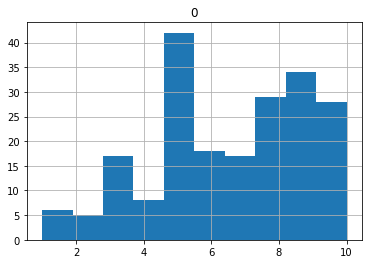

In [501]:
pd.DataFrame(preds).hist()

In [502]:
pd.DataFrame(preds).describe()

,0
count,204.000000
mean,6.638215
std,2.488978
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [503]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
n_subjects = 12
n_films = 8
pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
channels = [[] for i in range(n_subjects)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(preds)[i]
    num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
    labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(y_test)[i]
    channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(n_films):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

In [504]:
for [l, p] in zip(lbl, predicted):
    print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))

label : 9.00 predicted: 8.06 
label : 9.00 predicted: 8.39 
label : 2.00 predicted: 5.56 
label : 6.00 predicted: 8.44 
label : 2.00 predicted: 3.02 
label : 5.00 predicted: 4.82 
label : 5.00 predicted: 8.82 
label : 7.00 predicted: 6.72 
label : 9.00 predicted: 5.72 
label : 2.00 predicted: 4.33 
label : 4.00 predicted: 5.44 
label : 2.00 predicted: 9.29 


In [505]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [506]:
print('r2:', r2_score(lbl, predicted))
print('MAPE:', mean_absolute_percentage_error(lbl, predicted))
print('MAE : ', mean_absolute_error(lbl, predicted))

r2: -0.195237875405319
MAPE: 0.7707443913857525
MAE :  2.267964355432967


## Таблица со значениями метрик

In [507]:
data_all = pd.read_csv('lab_dataset_isolated2.csv')
data_all

,decorr_time,energy_freq_bands_band0,energy_freq_bands_band1,energy_freq_bands_band2,higuchi_fd,hjorth_complexity_spect,hjorth_mobility,hjorth_mobility_spect,kurtosis,line_length,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,-1.0,253071.771990,280289.645156,8.840164e+05,1.621390,1.702466e+07,0.412000,16895.343651,3.368091,3.235163,...,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1,1,1,10
1,-1.0,125252.336637,179372.463931,7.873685e+05,1.723846,1.713023e+07,0.513523,15627.150945,3.216062,3.053440,...,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,1,1,2,10
2,-1.0,89351.342249,133953.731641,8.501210e+05,1.796005,2.225149e+07,0.391551,18776.574242,2.884960,3.307870,...,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,1,1,3,10
3,-1.0,203459.174682,300399.347786,1.027728e+06,1.698447,2.001964e+07,0.416627,19509.090028,3.039223,3.411936,...,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,1,1,4,10
4,-1.0,296842.321452,479885.150142,8.991539e+05,1.597172,1.292433e+07,0.375233,15096.529326,3.392495,3.089760,...,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888,1,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-1.0,219343.220952,301831.917651,1.635197e+06,1.744889,3.213507e+07,0.162455,28498.151798,10.802971,4.089042,...,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,12,8,14,2
1566,-1.0,167840.498767,333544.192274,2.033546e+06,1.806685,4.939931e+07,0.201982,40698.248754,9.163263,4.490616,...,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,12,8,15,2
1567,-1.0,96553.098054,183425.939378,2.814730e+06,1.897423,8.624098e+07,0.208988,65607.078687,10.621240,5.255966,...,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,12,8,16,2
1568,-1.0,112135.432524,190996.383394,2.928666e+06,1.897296,7.447573e+07,0.228161,58963.454634,10.330144,5.499897,...,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,12,8,17,2


In [508]:
from tqdm import tqdm_notebook

In [509]:
models = ['MLPRegressor']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]

In [510]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 12
for film in tqdm_notebook(range(1, n_films + 1)):
    df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film', 'Subj', 'labels'], axis=1)
    X_test = X_test.drop(['film', 'Subj', 'labels'], axis=1)
    
    column_transformer = ColumnTransformer(
     transformers=[
      ('categories', OneHotEncoder(dtype='int'), categorical_columns),
      ('scaler', PowerTransformer(), numeric_columns)]
    )
    
    pipeline = Pipeline(
    steps=[("column_transformer", column_transformer), ("regressor", MLPRegressor(**params))]
    )
    model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer(output_distribution='normal'))
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    df[('MLPRegressor', 'R2', 'inverted')] = r2_score(preds, y_test)
    df[('MLPRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test)
    df[('MLPRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test)
    
    pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
    num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
    labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
    lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
    channels = [[] for i in range(n_subjects)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += preds[i]
        num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
        labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += y_test[i]
        channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(n_films):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])

    df[('MLPRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('MLPRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('MLPRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    result = pd.concat([result, df], axis=0)

  0%|          | 0/8 [00:00<?, ?it/s]

In [511]:
result

MLPRegressor                                                  
          MAPE                 MAE                  R2          
      inverted   average  inverted   average  inverted   average
0     0.561729  0.306753  2.189044  2.020780 -0.468349  0.166977
0     0.513720  0.380547  2.175565  1.945039 -0.437238  0.151830
0     0.656987  0.767854  2.627666  2.312346 -0.597838 -1.669978
0     0.666943  0.906658  3.048645  2.826045 -2.213241 -0.190527
0     0.945780  0.939475  3.223018  2.760449 -1.372835 -1.094182
0     0.449773  0.319348  1.801895  1.142683 -0.035202  0.479478
0     0.466723  0.402283  2.304645  2.017910 -0.457652 -0.670695
0     0.421032  0.808533  2.715384  2.505293 -0.831654 -0.322553

In [512]:
result.to_excel('metrics_MLP_lab7.xlsx')

In [513]:
result.describe()

MLPRegressor                                                  
              MAPE                 MAE                  R2          
          inverted   average  inverted   average  inverted   average
count     8.000000  8.000000  8.000000  8.000000  8.000000  8.000000
mean      0.585336  0.603931  2.510733  2.191318 -0.801751 -0.393706
std       0.171898  0.275896  0.480030  0.542410  0.687744  0.718831
min       0.421032  0.306753  1.801895  1.142683 -2.213241 -1.669978
25%       0.462485  0.365247  2.185674  1.999692 -0.966950 -0.776567
50%       0.537724  0.585069  2.466155  2.166563 -0.533093 -0.256540
75%       0.659476  0.833064  2.798699  2.569082 -0.452548  0.155616
max       0.945780  0.939475  3.223018  2.826045 -0.035202  0.479478

In [514]:
result.describe().to_excel('metrics_MLP_lab_described7.xlsx')

In [515]:
import warnings
import logging
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("shap").setLevel(logging.WARNING)

## Таблицы со значениями shap для всех фильмов (1 на тест, остальные на обучение)

In [518]:
data_all = pd.read_csv('lab_dataset_filtered_pt2.csv')
data_all

,decorr_time,energy_freq_bands_band0,energy_freq_bands_band1,energy_freq_bands_band2,higuchi_fd,hjorth_complexity_spect,hjorth_mobility,hjorth_mobility_spect,kurtosis,line_length,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,ch,film,Subj,labels
0,-0.095223,0.620344,-0.557968,-1.062000,-1.508059,-0.728947,0.159534,-0.801305,-0.912099,-0.704909,...,0.500408,0.165512,0.425724,-0.898790,0.636374,0.426182,1,1,1,10
1,-0.095223,-0.660499,-1.140919,-1.190545,-0.309281,-0.724203,0.628703,-0.875297,-1.032611,-0.890768,...,0.771026,0.645993,0.978993,-0.899332,1.093114,0.348555,2,1,1,10
2,-0.095223,-1.156389,-1.441039,-1.106508,0.449499,-0.503099,0.057216,-0.694843,-1.329939,-0.633732,...,0.846453,0.060819,0.227366,-0.899693,0.196293,0.374434,3,1,1,10
3,-0.095223,0.199919,-0.454274,-0.879960,-0.592489,-0.597308,0.182299,-0.654427,-1.184961,-0.534895,...,0.500090,0.189075,0.410607,-0.900777,0.113973,0.546229,4,1,1,10
4,-0.095223,0.927303,0.318446,-1.042321,-1.814557,-0.919344,-0.026494,-0.906799,-0.893579,-0.852689,...,0.096553,-0.025372,0.120720,-0.898970,0.727424,0.257740,6,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,-0.095223,0.343810,-0.447033,-0.217858,-0.081179,-0.122840,-1.320114,-0.202507,1.081322,0.028785,...,-1.201939,-1.328945,-1.249826,0.541832,-1.389574,0.026190,14,8,12,2
1554,-0.095223,-0.158421,-0.291579,0.135520,0.556360,0.416743,-1.047112,0.297491,0.904157,0.306222,...,-0.991066,-1.058550,-1.121445,0.542799,-1.314286,-0.333123,15,8,12,2
1555,-0.095223,-1.051057,-1.115342,0.682467,1.412473,1.182715,-1.000484,1.015174,1.064300,0.739976,...,-1.126341,-1.012130,-1.255733,0.541108,-1.407470,0.343160,16,8,12,2
1556,-0.095223,-0.833387,-1.068085,0.748695,1.411332,0.983622,-0.875456,0.856255,1.035823,0.855949,...,-0.882924,-0.887125,-0.877765,0.542557,-1.334765,0.317712,17,8,12,2


In [ ]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
result = pd.DataFrame()
grid_res = []
n_films = 8
for film in tqdm_notebook(range(1, n_films + 1)):
    if os.path.isfile('F{}_mlp_lab3.png'.format(film)):
        continue
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film','ch', 'Subj', 'labels',], axis=1)
    X_test = X_test.drop(['film','ch', 'Subj', 'labels'], axis=1)
    model = MLPRegressor(**params)
    model.fit(X_train, y_train)
    X_train_summary = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(model.predict, X_train_summary)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, max_display=50, show=False)
    plt.savefig('F{}_mlp_lab3.png'.format(film),  bbox_inches='tight')
    plt.clf()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]